# PREDICTOR

# Getting The Data

### Setup IG Session

In [1]:
pip install trading_ig pandas munch tenacity

In [2]:
import sys

sys.path.append("./utils/")

In [3]:
from utils.IG import IG

_IG = IG()
config_live = _IG.getLoginConfig('live')

IG - Instantiated


In [4]:
ig_service_live = _IG.getIgService(config_live)
_IG.getIgAccountDetails(ig_service_live)

{'accountType': 'CFD',
 'accountInfo': {'balance': 239.06,
  'deposit': 52.67,
  'profitLoss': -67.5,
  'available': 118.89},
 'currencyIsoCode': 'USD',
 'currencySymbol': '$',
 'currentAccountId': 'QM0EM',
 'lightstreamerEndpoint': 'https://apd.marketdatasystems.com',
 'accounts': [{'accountId': 'QM0EM',
   'accountName': 'CFD Live',
   'preferred': True,
   'accountType': 'CFD'}],
 'clientId': '104831189',
 'timezoneOffset': 8,
 'hasActiveDemoAccounts': True,
 'hasActiveLiveAccounts': True,
 'trailingStopsEnabled': False,
 'reroutingEnvironment': None,
 'dealingEnabled': True}

### Get the Data of GBP/USD Mini

In [5]:
TARGET_EPIC = 'CS.D.GBPUSD.MINI.IP'
RESOLUTION = '15Min'
DATA_POINTS = 8

In [6]:
try:
    history = _IG.getHistoricalPricesByDataPoints(ig_service_live, {'TARGET_EPIC':TARGET_EPIC, 
                                                                    'RESOLUTION':RESOLUTION, 
                                                                    'DATA_POINTS':DATA_POINTS})
    history['prices']
except Exception as e:
    print(e)
    sys.exit(1)

In [7]:
import pandas as pd

df_history = pd.DataFrame.from_dict(history['prices'])
df_history = df_history.reset_index()
df_history

DateTime      bid                                 ask           \
                          Open     High      Low    Close     Open     High   
0 2022-05-10 21:30:00  1.23305  1.23364  1.23199  1.23199  1.23314  1.23377   
1 2022-05-10 21:45:00  1.23200  1.23257  1.23125  1.23227  1.23215  1.23268   
2 2022-05-10 22:00:00  1.23230  1.23407  1.23070  1.23376  1.23239  1.23422   
3 2022-05-10 22:15:00  1.23375  1.23401  1.23310  1.23386  1.23390  1.23416   
4 2022-05-10 22:30:00  1.23387  1.23411  1.23259  1.23350  1.23396  1.23421   
5 2022-05-10 22:45:00  1.23349  1.23369  1.23107  1.23122  1.23358  1.23378   
6 2022-05-10 23:00:00  1.23124  1.23143  1.22940  1.22984  1.23133  1.23152   
7 2022-05-10 23:15:00  1.22985  1.23024  1.22924  1.22980  1.22994  1.23037   

                    last                        
       Low    Close Open High Low Close Volume  
0  1.23213  1.23214  NaN  NaN NaN   NaN   3218  
1  1.23136  1.23236  NaN  NaN NaN   NaN   3100  
2  1.23085  1.23391  NaN  NaN NaN   NaN   3975  
3  1.23325  1.23395  NaN  NaN NaN   NaN   3713  
4  1.23270  1.23359  NaN  NaN NaN   NaN   3425  
5  1.23116  1.23131  NaN  NaN NaN   NaN   3605  
6  1.22953  1.22993  NaN  NaN NaN   NaN   3573  
7  1.22934  1.22989  NaN  NaN NaN   NaN   2353

In [8]:
df_history = df_history.sort_values(by=['DateTime'], ascending=False)
df_history

DateTime      bid                                 ask           \
                          Open     High      Low    Close     Open     High   
7 2022-05-10 23:15:00  1.22985  1.23024  1.22924  1.22980  1.22994  1.23037   
6 2022-05-10 23:00:00  1.23124  1.23143  1.22940  1.22984  1.23133  1.23152   
5 2022-05-10 22:45:00  1.23349  1.23369  1.23107  1.23122  1.23358  1.23378   
4 2022-05-10 22:30:00  1.23387  1.23411  1.23259  1.23350  1.23396  1.23421   
3 2022-05-10 22:15:00  1.23375  1.23401  1.23310  1.23386  1.23390  1.23416   
2 2022-05-10 22:00:00  1.23230  1.23407  1.23070  1.23376  1.23239  1.23422   
1 2022-05-10 21:45:00  1.23200  1.23257  1.23125  1.23227  1.23215  1.23268   
0 2022-05-10 21:30:00  1.23305  1.23364  1.23199  1.23199  1.23314  1.23377   

                    last                        
       Low    Close Open High Low Close Volume  
7  1.22934  1.22989  NaN  NaN NaN   NaN   2353  
6  1.22953  1.22993  NaN  NaN NaN   NaN   3573  
5  1.23116  1.23131  NaN  NaN NaN   NaN   3605  
4  1.23270  1.23359  NaN  NaN NaN   NaN   3425  
3  1.23325  1.23395  NaN  NaN NaN   NaN   3713  
2  1.23085  1.23391  NaN  NaN NaN   NaN   3975  
1  1.23136  1.23236  NaN  NaN NaN   NaN   3100  
0  1.23213  1.23214  NaN  NaN NaN   NaN   3218

In [9]:
df_history.describe()

bid                                     ask                      \
           Open      High       Low     Close      Open      High       Low   
count  8.000000  8.000000  8.000000  8.000000  8.000000  8.000000  8.000000   
mean   1.232444  1.232970  1.231167  1.232030  1.232549  1.233089  1.231290   
std    0.001394  0.001441  0.001389  0.001647  0.001399  0.001446  0.001396   
min    1.229850  1.230240  1.229240  1.229800  1.229940  1.230370  1.229340   
25%    1.231810  1.232285  1.230375  1.230875  1.231945  1.232390  1.230520   
50%    1.232675  1.233665  1.231160  1.232130  1.232765  1.233775  1.231260   
75%    1.233555  1.234025  1.232140  1.233565  1.233660  1.234172  1.232272   
max    1.233870  1.234110  1.233100  1.233860  1.233960  1.234220  1.233250   

                last                               
          Close Open High  Low Close       Volume  
count  8.000000  0.0  0.0  0.0   0.0     8.000000  
mean   1.232135  NaN  NaN  NaN   NaN  3370.250000  
std    0.001656  NaN  NaN  NaN   NaN   494.747482  
min    1.229890  NaN  NaN  NaN   NaN  2353.000000  
25%    1.230965  NaN  NaN  NaN   NaN  3188.500000  
50%    1.232250  NaN  NaN  NaN   NaN  3499.000000  
75%    1.233670  NaN  NaN  NaN   NaN  3632.000000  
max    1.233950  NaN  NaN  NaN   NaN  3975.000000

# Data Transformation

### Refer to the Notebook (Data_Transformer.ipynb) for the detailed process

In [10]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [11]:
import tensorflow as tf

In [12]:
from datetime import datetime

In [13]:
param = df_history
mode = "predictor"
%run ./utils/Data_Transformer.ipynb

Note: you may need to restart the kernel to use updated packages.


In [14]:
df_min_max_scaled

,Open,High,Low,Close,Volume,O-H,O-L,C-H,C-L,H-L,O-C-Value,O-C-Sign
6,0.032591,0.027463,0.022913,0.023009,0.464913,0.030111,0.170093,0.129660,0.044086,0.158109,0.155801,0.0
5,0.047706,0.042788,0.034066,0.032389,0.469080,0.033281,0.225234,0.200162,0.016129,0.207824,0.249724,0.0
4,0.050337,0.045636,0.044407,0.047706,0.445645,0.038035,0.118692,0.050243,0.095699,0.117359,0.041989,0.0
3,0.049730,0.045094,0.047989,0.050202,0.483140,0.039620,0.060748,0.013776,0.078495,0.067645,0.008840,1.0
2,0.039744,0.045569,0.031767,0.049730,0.517250,0.285261,0.146729,0.025122,0.329032,0.268949,0.164641,1.0
1,0.037922,0.035261,0.035282,0.039406,0.403333,0.087163,0.072897,0.025932,0.108602,0.102689,0.025414,1.0
0,0.044804,0.042585,0.040419,0.037787,0.418695,0.096672,0.097196,0.132901,0.001075,0.128769,0.113812,0.0


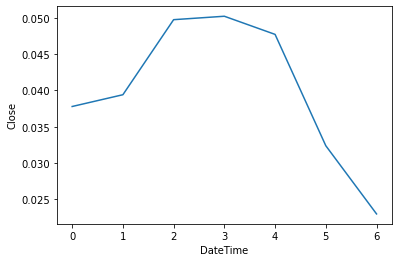

<Figure size 1152x648 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt

plt.plot(df_min_max_scaled['Close'])

plt.xlabel("DateTime")
plt.ylabel("Close")

fig = plt.figure()
fig.set_figheight(9)
fig.set_figwidth(16)

plt.show()

In [16]:
df_history2

DateTime      bid                                 ask           \
                          Open     High      Low    Close     Open     High   
6 2022-05-10 23:00:00  1.23124  1.23143  1.22940  1.22984  1.23133  1.23152   
5 2022-05-10 22:45:00  1.23349  1.23369  1.23107  1.23122  1.23358  1.23378   
4 2022-05-10 22:30:00  1.23387  1.23411  1.23259  1.23350  1.23396  1.23421   
3 2022-05-10 22:15:00  1.23375  1.23401  1.23310  1.23386  1.23390  1.23416   
2 2022-05-10 22:00:00  1.23230  1.23407  1.23070  1.23376  1.23239  1.23422   
1 2022-05-10 21:45:00  1.23200  1.23257  1.23125  1.23227  1.23215  1.23268   
0 2022-05-10 21:30:00  1.23305  1.23364  1.23199  1.23199  1.23314  1.23377   

                      last      mid                             
       Low    Close Volume     Open     High      Low    Close  
6  1.22953  1.22993   3573  1.23129  1.23148  1.22947  1.22988  
5  1.23116  1.23131   3605  1.23353  1.23374  1.23112  1.23127  
4  1.23270  1.23359   3425  1.23392  1.23416  1.23265  1.23354  
3  1.23325  1.23395   3713  1.23383  1.23408  1.23318  1.23391  
2  1.23085  1.23391   3975  1.23235  1.23415  1.23078  1.23384  
1  1.23136  1.23236   3100  1.23208  1.23263  1.23130  1.23231  
0  1.23213  1.23214   3218  1.23310  1.23371  1.23206  1.23207

In [30]:
df = df_min_max_scaled.copy()

In [18]:
# column_indices = {name: i for i, name in enumerate(df.columns)}

# n = len(df)
# train_df = df[0:int(n*0.7)]
# val_df = df[int(n*0.7):int(n*0.9)]
# test_df = df[int(n*0.9):]

# num_features = df.shape[1]

In [31]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df
val_df = df
test_df = df

num_features = df.shape[1]

In [32]:
import numpy as np

class WindowGenerator():
    def __init__(self, input_width, label_width, shift,
                 train_df=train_df, val_df=val_df, test_df=test_df,
                 label_columns=None):
        # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                          enumerate(label_columns)}
            self.column_indices = {name: i for i, name in
                                   enumerate(train_df.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])

In [33]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['Close'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['Close']

In [40]:
w2 = WindowGenerator(input_width=7, label_width=1, shift=1,
                     label_columns=['Close'])
w2

Total window size: 8
Input indices: [0 1 2 3 4 5 6]
Label indices: [7]
Label column name(s): ['Close']

In [41]:
wide_window = WindowGenerator(
    input_width=7, label_width=1, shift=1,
    label_columns=['Close'])

wide_window

Total window size: 8
Input indices: [0 1 2 3 4 5 6]
Label indices: [7]
Label column name(s): ['Close']

In [42]:
def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
        labels = tf.stack(
            [labels[:, :, self.column_indices[name]] for name in self.label_columns], axis=-1)
        
    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])
    
    return inputs, labels

WindowGenerator.split_window = split_window

In [43]:
import tensorflow as tf

In [44]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

InvalidArgumentError: Shapes of all inputs must match: values[0].shape = [7,12] != values[1].shape = [0,12] [Op:Pack] name: stack

In [35]:
import matplotlib.pyplot as plt

def plot(self, model=None, plot_col='Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    
    for n in range(max_n):
        plt.subplot(max_n, 1, n+1)
        plt.ylabel(f'{plot_col} [normed]')
        plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                 label='Inputs', marker='.', zorder=-10)

        if self.label_columns:
            label_col_index = self.label_columns_indices.get(plot_col, None)
        else:
            label_col_index = plot_col_index

        if label_col_index is None:
            continue

        plt.scatter(self.label_indices, labels[n, :, label_col_index],
                    edgecolors='k', label='Labels', c='#2ca02c', s=64)
        if model is not None:
            predictions = model(inputs)
            plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                        marker='X', edgecolors='k', label='Predictions',
                        c='#ff7f0e', s=64)

        if n == 0:
            plt.legend()
        
    plt.xlabel('DateTime')

WindowGenerator.plot = plot

In [24]:
def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=True,
        batch_size=32,)
    
    ds = ds.map(self.split_window)
    return ds

WindowGenerator.make_dataset = make_dataset

In [25]:
@property
def train(self):
    return self.make_dataset(self.train_df)

@property
def val(self):
    return self.make_dataset(self.val_df)

@property
def test(self):
    return self.make_dataset(self.test_df)

@property
def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
        # No example batch was found, so get one from the `.train` dataset
        result = next(iter(self.train))
        # And cache it for next time
        self._example = result
    return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [26]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', model(wide_window.example[0]).shape)

StopIteration: 

# Predict

In [27]:
PREDICTOR_NAME = 'lstm_model'

In [28]:
model = tf.keras.models.load_model(f'''../models/{PREDICTOR_NAME}''')

In [ ]:
prediction = model.predict(wide_window.test)
prediction

In [29]:
prediction = model.predict(df)
prediction

ValueError: in user code:

    File "C:\Users\zaimp\anaconda3\envs\ScalpFX\lib\site-packages\keras\engine\training.py", line 1801, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\zaimp\anaconda3\envs\ScalpFX\lib\site-packages\keras\engine\training.py", line 1790, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\zaimp\anaconda3\envs\ScalpFX\lib\site-packages\keras\engine\training.py", line 1783, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\zaimp\anaconda3\envs\ScalpFX\lib\site-packages\keras\engine\training.py", line 1751, in predict_step
        return self(x, training=False)
    File "C:\Users\zaimp\anaconda3\envs\ScalpFX\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\zaimp\anaconda3\envs\ScalpFX\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_10" is incompatible with the layer: expected shape=(None, 7, 12), found shape=(None, 12)


In [ ]:
import matplotlib.pyplot as plt

plt.plot(prediction)

plt.xlabel("DateTime")
plt.ylabel("Close")

fig = plt.figure()
fig.set_figheight(9)
fig.set_figwidth(16)

plt.show()

In [ ]:
norm_prediction = round2(prediction[len(prediction)-1], 5)
norm_prediction

### Get the UnNormalization Parameters

In [ ]:
import json

f = open('../models/unnormalized_parameters.json')
data = json.load(f)
f.close()

In [ ]:
data['Close']

### UnNormalized the Prediction

In [ ]:
# X = normX * (maxX - minX) + minX

predicted = norm_prediction * (data['Close']['max'] - data['Close']['min']) + data['Close']['min']
predicted = round2(predicted, 5)
predicted

# Decision

In [ ]:
df_history2.iloc[[len(df_history2)-1]]

In [ ]:
current_candle = df_min_max_scaled.iloc[[len(df_min_max_scaled)-1]]
current_candle

In [ ]:
current_close = round2(current_candle['Close'].values[0] * (data['Close']['max'] - data['Close']['min']) + data['Close']['min'], 5)
print(f'''current_close: {current_close}''')

In [ ]:
predicted
print(f'''prediction: {predicted}''')

In [ ]:
change = round2((predicted - current_close), 5)
change

In [ ]:
CONFIDENCE_THRESHOLD = 0.0005
PROFIT_PIP = 0.0002

In [ ]:
to_deal = True
deal_direction = None
profit_limit = None

if abs(change) > CONFIDENCE_THRESHOLD:
    if change > 0:
        print("BUY")
        deal_direction = 'BUY'
        profit_limit = round2(current_close+PROFIT_PIP, 5)
        print(f'''Limit: {profit_limit}''')
    elif change < 0:
        print("SELL")
        deal_direction = 'SELL'
        profit_limit = round2(current_close-PROFIT_PIP, 5)
        print(f'''Limit: {profit_limit}''')
    else:
        print("NEUTRAL")
        to_deal = False

# IG Trade - Open Deal

In [ ]:
LIMIT_BUY_COUNT = 1
LIMIT_SELL_COUNT = 1

In [ ]:
DEAL_SIZE = 1

In [ ]:
# if to_deal and _IG.isAllowedToOpenDeal(ig_service_live, {deal_direction, 
#                                                          LIMIT_BUY_COUNT,
#                                                          LIMIT_SELL_COUNT}):
#     _IG.openDeal(ig_service_live, {'currency_code':'USD',
#                                    'direction':deal_direction,
#                                    'epic':TARGET_EPIC,
#                                    'order_type':'MARKET',
#                                    'expiry':'DFB',
#                                    'force_open':'true',
#                                    'guaranteed_stop':'false',
#                                    'size':DEAL_SIZE, 
#                                    'level':None,
#                                    'limit_distance':PROFIT_PIP,
#                                    'limit_level':None,
#                                    'quote_id':None,
#                                    'stop_level':None,
#                                    'stop_distance':None,
#                                    'trailing_stop'=None,
#                                    'trailing_stop_increment'=None})
        